In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
crime=pd.read_csv("E:DataSet/crime_data.csv")
crime.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


### Creating a function to normalise the values

In [3]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return (x)

In [5]:
crime_norm=norm_func(crime.iloc[:,1:])
crime_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


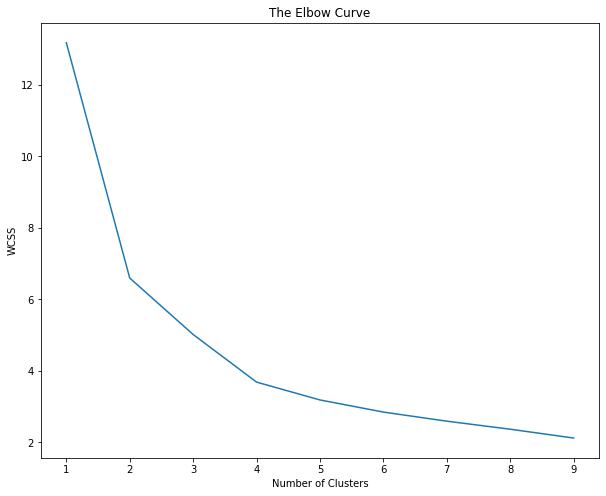

In [6]:
fig=plt.figure(figsize=(10,8))
WCSS=[]
for i in range(1,10):
    clf=KMeans(n_clusters=i)
    clf.fit(crime_norm)
    WCSS.append(clf.inertia_)
plt.plot(range(1,10),WCSS)
plt.title("The Elbow Curve")
plt.ylabel("WCSS")
plt.xlabel("Number of Clusters")
plt.show()

In [7]:
#from the elbow curve we can see that n=4 is the optimised value for cluster numbers
clf=KMeans(n_clusters=5)
y_kmeans=clf.fit_predict(crime_norm)

In [11]:
#cluster labels
clf.labels_

array([3, 0, 0, 2, 0, 0, 4, 2, 0, 3, 4, 1, 0, 2, 1, 2, 2, 3, 1, 0, 4, 0,
       1, 3, 2, 2, 2, 0, 1, 4, 0, 0, 3, 1, 4, 2, 2, 4, 4, 3, 1, 3, 0, 4,
       1, 2, 4, 1, 1, 2])

In [12]:
md=pd.Series(y_kmeans)
crime['Cluster']=md
crime

,State,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,4
7,Delaware,5.9,238,72,15.8,2
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,3


In [17]:
crime.iloc[:,1:].groupby(crime.Cluster).mean() #grouping by cluster values

,Murder,Assault,UrbanPop,Rape,Cluster
Cluster,,,,,
0,10.966667,264.000000,76.500000,33.608333,0
1,2.680000,70.100000,51.000000,10.910000,1
2,6.975000,148.416667,62.333333,19.775000,2
3,14.671429,251.285714,54.285714,21.685714,3
4,4.955556,125.444444,80.111111,17.788889,4


Text(0.5, 1.0, 'Clusters Using Kmeans')

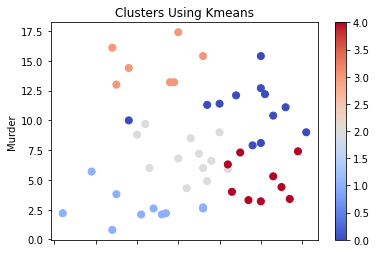

In [18]:
#scatter plot for kmeans clusters
crime.plot(x="UrbanPop",y="Murder",c=clf.labels_,kind="scatter",s=50,cmap=plt.cm.coolwarm)
plt.title("Clusters Using Kmeans")

In [19]:
clf.inertia_

3.183157731676654

In [20]:
WCSS

[13.184122550256445,
 6.596893867946199,
 5.016388924690672,
 3.683456153585915,
 3.1842618139677223,
 2.8447542871840574,
 2.5899748382781587,
 2.365169610203217,
 2.1180697116443152]